# Assignment 1: Class Activation Mapping from Pre-Trained Networks

In this assignment, we visualize the regions in an image which a pre-trained ResNet-18 network uses to make its predictions.
For this purpose, we make use of the Grad-CAM technique as introduced in the lecture.
Particularly, we compute the partial derivative of the output of the network $z_o$ for class $o$ with respect to the output of the final convolutional layer $\mathcal A \in \mathbb R^{Q\times K\times M}$, which we sum over the spatial feature map dimensions:

$$\alpha_q^o = \frac1{KM}\sum\limits_{k,m} \frac{\partial z_o}{\partial a_{q,k,m}}$$

Afterward, the class activation map $\mathbf M_o$ for class $o$ is computed as the weighted average over the channels of the feature map:

$$\mathbf M_o = \max\left(\sum\limits_q \alpha_q^o \mathbf A_q, 0\right)$$

which is finally normalized to $[0,1]$ by dividing by its maximum value:

$$\mathbf M_o' = \frac{\mathbf M_o}{\max \mathbf M_o}$$


The (pre-trained) ResNet network can be obtained via functionality in the `torchvision` library: https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html
Since we cannot modify the network topology using a class definition, we make use of the flexibility of python, which allows reimplementing specific functions.
Particularly, we will reimplement the `_forward_impl` function (which is called in `forward`).
For your reference, the original implementation of the `_forward_impl` function is defined in the following code block, and online: https://github.com/pytorch/vision/blob/61d97f41bc209e1407dcfbd685d2ee2da9c1cdad/torchvision/models/resnet.py#L266

In [ ]:
import torch
import torchvision


## Task (c): Network Instantiation

Instantiate a pre-trained ResNet-18 network -- the weights will be downloaded automatically.
Manipulate the `_forward_impl` function such that it returns all required features that you will need to compute the final Class Activation Map visualization.

The final python functionality to overwrite this function in the network is already provided at the end of the code block -- do not change this.

In [1]:
import torch
import torchvision

# instantiate pre-trained ResNet-18 network


# manipulate network to return the feature map

    

    # return all elements that we will need later on
   

# overwrite this function in the pre-trained network


## Test Image Download

We here make use of a single image for visualization, which contains two classes defined in ImageNet, a teddy bear (class $o=850$) and an ice cream (class $o=928$).
Please run the code cell below to download the image, and to visualize its content.

Downloaded file Teddy+Ice.jpg


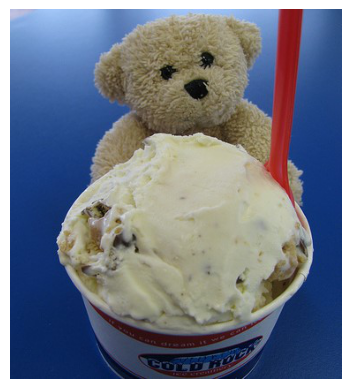

In [2]:
# download our test image
filename = "Teddy+Ice.jpg"
# download the file from our seafile server
import os
if not os.path.exists(filename):
    url = f"https://seafile.ifi.uzh.ch/f/00df3ed1403d483d87f3/?dl=1"
    import urllib.request
    urllib.request.urlretrieve(url, filename)
    print ("Downloaded file", filename)

# open the image using PIL (the default image processing library in PyTorch)
import PIL.Image
pil_image = PIL.Image.open(filename)

# show image
from matplotlib import pyplot
pyplot.imshow(pil_image)
_ = pyplot.axis("off")

## Task (d): Feature Extraction

Implement the image preprocessing steps defined in Task (a) which are required for the ResNet-18 network pre-trained on the ImageNet dataset.
Apply these steps to the test image `pil_image` as created in the above code block.
Use the pre-trained network defined in Task (c) to extract all information required to compute the visualization.

In [3]:
# preprocess the image


# extract all information from the ResNet network


## Task (e): Visualization and Overlay

Implement a function that computes the visualization mask $\mathbf M_o'$ for a given class $o$, as analytically computed in Task (b).
Make use of the elements of the network as defined in Tasks (c) and the features extracted in Task (d).

Finally, multiply the activation map with the preprocessed input image to highlight the regions that are of importance to classify class $o$.
What do you need to consider in order to achieve this?

In [ ]:
def class_activation_map(o):
    # compute the weights for class o alpha_q^o for all convolution channels q
    
    

    # compute the class activation map M_o as given above
    
    

    # normalize the activation map
   
    # multiply the map with the image
   

    # return this overlay
    

## Visualization

Finally, we visualize the parts of the image used to predict class Teddy (at index 850) and class Ice Cream (at index 928).
Note that this cell is only for visualization purposes.
If this does not run and raises exceptions in the visualization part, there is no need from your side to fix this.
If the images are not produced correctly, however, check your implementation in Task (e).

In [ ]:
from matplotlib import pyplot

fig, axes = pyplot.subplots(1, 2, figsize=(10,5))

# visualize the class teddy on the left
teddy = class_activation_map(850)
axes[0].imshow(teddy.detach().permute(1,2,0))
axes[0].axis("off")

# visualize the class ice cream on the right
ice_cream = class_activation_map(928)
axes[1].imshow(ice_cream.detach().permute(1,2,0))
axes[1].axis("off")